# Day 1, Practical 1
## Introducting MDAnalysis and working with molecules

**This notebook introduces the fundamental objects of `MDAnalysis`:**

 - the `Universe`,
 - `AtomGroup`, and `Atom` objects.
 - selecting and manipulating `AtomGroup`s
 - `Residue`s and `Segment`s
 - `Bond` `Angle` and `Dihedral`


**Additional resources**
 - During the workshop, feel free to ask questions at any time
 - For more on how to use MDAnalysis, see the [User Guide](https://userguide.mdanalysis.org/2.0.0-dev0/) and [documentation](https://docs.mdanalysis.org/2.0.0-dev0/)
 - Ask questions on the [user mailing list](https://groups.google.com/group/mdnalysis-discussion) or on [Discord](https://discord.gg/fXTSfDJyxE)
 - Report bugs on [GitHub](https://github.com/MDAnalysis/mdanalysis/issues?)

# 1. Fundamental MDAnalysis objects

## Universe loading 101

> "If you wish to make an apple pie from scratch, you must first invent the Universe." 

> ~ Carl Sagan

First, we need to import `MDAnalysis`, giving us access to all the components in its namespace:

In [1]:
import MDAnalysis as mda

One of the most fundamental objects in the `MDAnalysis` data model is the `Universe` object.
A `Universe` can be thought of as an interface to all the data of a simulation;
it contains all of a simulations' topology information (names, charges, masses etc) at the least,
but usually also includes trajectory information (positions, velocities etc) as well.

In order to do anything, we do need some actual molecular dynamics data to work with. Let's load an example (the protein adenylate kinase, or AdK) from the MDAnalysis tests data:

In [2]:
from MDAnalysis.tests.datafiles import PSF, DCD

To make a `Universe`, we need at the very least a topology file - see the [topology readers](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/topology/init.html) documentation for a list of supported file formats. 

Since the type of topology file we're using in this example (a PSF file) doesn't contain coordinates, we'll also need to load a trajectory file (in this case a DCD file) so we have some position data to work with later. You'll learn more about working with trajectories in the next session. 


In [3]:
u = mda.Universe(PSF, DCD)

print(u)

<Universe with 3341 atoms>


## AtomGroups

We now have a `Universe` object. Since the topology (PSF) file we loaded contained both atom identities and bond information, the `Universe` is able to access these details.



We can access all atoms in the `Universe` through the `Universe.atoms` attribute.
This returns an `AtomGroup`, which is probably the most important class we will learn about.

In [4]:
ag = u.atoms
type(ag)

MDAnalysis.core.groups.AtomGroup

An `AtomGroup` is like an array of atoms, and offers access to the data of these atoms through various attributes:

In [5]:
ag.indices

array([   0,    1,    2, ..., 3338, 3339, 3340])

In [6]:
ag.names

array(['N', 'HT1', 'HT2', ..., 'C', 'OT1', 'OT2'], dtype=object)

In [7]:
ag.resnames

array(['MET', 'MET', 'MET', ..., 'GLY', 'GLY', 'GLY'], dtype=object)

In [8]:
ag.resids

array([  1,   1,   1, ..., 214, 214, 214])

In [9]:
ag.charges

array([-0.30000001,  0.33000001,  0.33000001, ...,  0.34      ,
       -0.67000002, -0.67000002])

In [10]:
ag.masses

array([14.007,  1.008,  1.008, ..., 12.011, 15.999, 15.999])

In [11]:
ag.types

array(['56', '2', '2', ..., '32', '72', '72'], dtype=object)

All of these attributes of an `AtomGroup` return numpy arrays of the same length as the `AtomGroup` itself;
that is, each element corresponds to each atom in the `AtomGroup`, in order.

In [12]:
print(ag.n_atoms)
print(len(ag.names))

3341
3341


In general, `MDAnalysis` will try and extract as much information as possible from the files given to `Universe`. The [topology readers](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/topology/init.html) documentation lists the attributes that are extracted from each filetype.

## Working with individual atoms

By slicing an `AtomGroup` we can access individual `Atom` objects.
These `Atom` objects will have singular versions of the various attributes of `AtomGroup`s.

In general working with individual `Atom` objects is discouraged as it is inefficient and will lead to poor performance.

In [13]:
u = mda.Universe(PSF, DCD)
a = u.atoms[0]
print(a)

<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>


In [14]:
print("name:", a.name)
print("resid:", a.resid)
print("resname:", a.resname)

name: N
resid: 1
resname: MET


## ResidueGroups and SegmentGroups

The `Universe` also gives higher-order topology objects, including `ResidueGroups` and `SegmentGroups`. We can access all residues in the `Universe` with:

In [15]:
u.residues

<ResidueGroup with 214 residues>

And all segments with:

In [16]:
u.segments

<SegmentGroup with 1 segment>

`ResidueGroups` and `SegmentGroups` also behave similarly to `AtomGroups`, with many of their methods returning `numpy` arrays with each element corresponding to a single residue or segment, respectively.

In [17]:
u.residues.resnames

array(['MET', 'ARG', 'ILE', 'ILE', 'LEU', 'LEU', 'GLY', 'ALA', 'PRO',
       'GLY', 'ALA', 'GLY', 'LYS', 'GLY', 'THR', 'GLN', 'ALA', 'GLN',
       'PHE', 'ILE', 'MET', 'GLU', 'LYS', 'TYR', 'GLY', 'ILE', 'PRO',
       'GLN', 'ILE', 'SER', 'THR', 'GLY', 'ASP', 'MET', 'LEU', 'ARG',
       'ALA', 'ALA', 'VAL', 'LYS', 'SER', 'GLY', 'SER', 'GLU', 'LEU',
       'GLY', 'LYS', 'GLN', 'ALA', 'LYS', 'ASP', 'ILE', 'MET', 'ASP',
       'ALA', 'GLY', 'LYS', 'LEU', 'VAL', 'THR', 'ASP', 'GLU', 'LEU',
       'VAL', 'ILE', 'ALA', 'LEU', 'VAL', 'LYS', 'GLU', 'ARG', 'ILE',
       'ALA', 'GLN', 'GLU', 'ASP', 'CYS', 'ARG', 'ASN', 'GLY', 'PHE',
       'LEU', 'LEU', 'ASP', 'GLY', 'PHE', 'PRO', 'ARG', 'THR', 'ILE',
       'PRO', 'GLN', 'ALA', 'ASP', 'ALA', 'MET', 'LYS', 'GLU', 'ALA',
       'GLY', 'ILE', 'ASN', 'VAL', 'ASP', 'TYR', 'VAL', 'LEU', 'GLU',
       'PHE', 'ASP', 'VAL', 'PRO', 'ASP', 'GLU', 'LEU', 'ILE', 'VAL',
       'ASP', 'ARG', 'ILE', 'VAL', 'GLY', 'ARG', 'ARG', 'VAL', 'HSD',
       'ALA', 'PRO',

In [18]:
u.segments.segids

array(['4AKE'], dtype=object)

You can also create a `ResidueGroup` from an `AtomGroup`:

In [19]:
ag.residues

<ResidueGroup with 214 residues>

## Exercise 1

**1a. Load the GRO topology file from `MDAnalysis.tests.datafiles` and count how many atoms, residues and segments it contains.**

In [20]:
from MDAnalysis.tests.datafiles import GRO
u_gro = mda.Universe(GRO)
print('Atoms: ', u_gro.atoms.n_atoms)
print('Residues: ', u_gro.residues.n_residues)
print('Segments: ', u_gro.segments.n_segments)

Atoms:  47681
Residues:  11302
Segments:  1


In [21]:
# Exercise 1a


**1b. From the above universe, find the name of the:**
  - first segment
  - last atom
  - 10th residue.

In [22]:
print('First segment:', u_gro.segments[0].segid)
print('Last atom: ', u_gro.atoms[-1].name)
print('10th residue: ', u_gro.residues[10].resname)

First segment: SYSTEM
Last atom:  NA
10th residue:  ALA


In [23]:
# Exercise 1b


# 2. Selecting atoms

It is also rare that we want to operate on all atoms in the system!

`MDAnalysis` offers a few different ways to select atoms,
in this section we will go over the most useful methods.

## Numpy style selections

As previously mentioned, an `AtomGroup` is like an array of atoms,
and therefore we can slice it exactly like we would slice a `numpy` array.

### Fancy indexing

The simplest option to select specific atom is to use fancy indexing. You can specify the atoms in a list

In [24]:
u = mda.Universe(PSF, DCD)
u.atoms[[1, 4, 5 , 0]]

<AtomGroup with 4 atoms>

or as a range

In [25]:
u.atoms[1:10]

<AtomGroup with 9 atoms>

### Boolean indexing

You can also create an array with `True`/`False` values of the same length as the `AtomGroup`. Every atom for which the array is set to `True` will be selected.

We can create such a boolean array by doing a comparison of a `numpy` array:

In [26]:
selection_ar = u.atoms.resnames == 'GLY'
print("selection array = ", selection_ar)
u.atoms[selection_ar]

selection array =  [False False False ...  True  True  True]


<AtomGroup with 141 atoms>

or shorter:

In [27]:
u.atoms[u.atoms.resnames == 'GLY']

<AtomGroup with 141 atoms>

We can also do this with `ResidueGroup`s and `SegmentGroup`s, e.g.:

In [28]:
u.residues[u.residues.resnames == 'GLY']

<ResidueGroup with 20 residues>

## Selection Strings and `select_atoms`

We've already seen that complex selections can be performed on `AtomGroups` using numpy style indexing.
However, `MDAnalysis` also features a CHARMM-style atom selection mechanism that is often more convenient.
We can consult the docstring for `select_atoms` to see the available selection keywords:

In [29]:
u.atoms.select_atoms?

You can also see them in the docs [here](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/selections.html).

Although boolean selections work well enough for selecting out atoms from AtomGroups, the selection language makes more complex selections possible with probably less effort.

For example, we can select all glycines by:

In [30]:
glycines = u.select_atoms("resname GLY")
glycines

<AtomGroup with 141 atoms>

If selecting by residue number, we can specify a range:

In [31]:
first10resids = u.select_atoms("resid 1-10")
first10resids

<AtomGroup with 157 atoms>

We can use `and`/`or`/`not` with [logical conjunctions](https://en.wikipedia.org/wiki/Logical_conjunction):

In [32]:
acidic = u.select_atoms("resname GLU or resname ASP")
acidic

<AtomGroup with 474 atoms>

For name like selections, we can also Unix shell-style wildcards such as `*`. Here for example `name OD*` would select atoms named `OD1, OD2, OD3` etc:

In [33]:
acidic_o = acidic.select_atoms('name OD* or name OE*')
acidic_o

<AtomGroup with 70 atoms>

As a shortcut, multiple values can be given and these will be implicitly OR'd together.
To select all atoms with name NZ or NH* in residues named LYS or ARG:

In [34]:
basic_n = u.select_atoms("(resname LYS ARG) and (name NZ NH*)")
basic_n

<AtomGroup with 44 atoms>

There are also several preset keywords for useful selections such as `backbone`, which selects all CA, C, O and N atoms:

In [35]:
backbone_1 = u.select_atoms('backbone')
backbone_2 = u.select_atoms('name CA C O N')
backbone_1 == backbone_2

True

### Geometric selections

The `select_atoms` method also has various geometric keywords that make selecting atoms based on geometric criteria much easier.

For example, we can look for salt bridges by using the `around` selection operator to specify only atoms within 4 angstroms of a particular selection. Note we can simplify selection strings by referring to previous `AtomGroups`.

In [36]:
acidic = u.select_atoms("group acidic and around 4 group basic", acidic=acidic_o, basic=basic_n)
acidic

<AtomGroup with 46 atoms>

You can also select atoms based on absolute position using `prop`, e.g.:

In [37]:
upper_z = u.select_atoms('prop z > 10')
upper_z

<AtomGroup with 468 atoms>

## Set operations

`AtomGroup`s can also be combined using `&` for "and" and `|` for "or":

In [38]:
heavy = u.atoms[u.atoms.masses > 10]
arg = u.atoms[u.atoms.resnames == 'ARG']
print(len(heavy), len(arg))
print(len(heavy & arg))

1656 312
143


These two selections are identical:

In [39]:
ag1 = u.atoms.select_atoms('resname LYS ARG')
ag2 = u.atoms.select_atoms('resname LYS') | u.atoms.select_atoms('resname ARG')

ag1 == ag2

True

We can also concatenate atomgroups with `+` and subtract with `-`; the following two selections are also identical: 

In [40]:
no_H1 = u.atoms.select_atoms('resname LYS ARG and not name H*')
no_H2 = u.atoms.select_atoms('resname LYS ARG') - u.atoms.select_atoms('name H*')

no_H1 == no_H2

True

By design, an `AtomGroup` can have repeats of the same atom, for example through this selection:

In [41]:
ag = u.atoms[[0, 0, 1, 2, 4, 4, 5]]
ag

<AtomGroup with 7 atoms>

The `unique` property will return a version of the `AtomGroup` with only one of each Atom:

In [42]:
ag.unique

<AtomGroup with 5 atoms>

## Exercise 2

**2a. Select residues 100 to 200, first using indexing and then using a selection string, and confirm you get the same selection.**

In [43]:
ag1 = u.residues[99:200]
ag2 = u.select_atoms("resid 100-200").residues
ag1 == ag2

True

In [44]:
# Exercise 2a


What might be some reasons to prefer one method over the other?

**2b. Count the number of arginine residues**

In [45]:
ag = u.select_atoms('resname ARG')
print(len(ag.residues))

13


In [46]:
# Exercise 2b


**2c. Select all nitrogen atoms within 5.0A of a carbon atom**

In [47]:
ag = u.select_atoms('name N* and around 5 name CA')
print(ag)

<AtomGroup [<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>, <Atom 20: N of type 54 of resname ARG, resid 2 and segid 4AKE>, <Atom 33: NE of type 57 of resname ARG, resid 2 and segid 4AKE>, ..., <Atom 3296: N of type 54 of resname ILE, resid 212 and segid 4AKE>, <Atom 3315: N of type 54 of resname LEU, resid 213 and segid 4AKE>, <Atom 3334: N of type 54 of resname GLY, resid 214 and segid 4AKE>]>


In [48]:
# Exercise 2c


**2d. Select all hydrogens that are bonded to an alpha carbon**

*Hint: Look through the `select_atoms` docstring above or [here](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/selections.html) for keywords that might help!*

In [49]:
ag = u.select_atoms('name H* and bonded name CA')
print(ag)

<AtomGroup [<Atom 6: HA of type 6 of resname MET, resid 1 and segid 4AKE>, <Atom 23: HA of type 6 of resname ARG, resid 2 and segid 4AKE>, <Atom 47: HA of type 6 of resname ILE, resid 3 and segid 4AKE>, ..., <Atom 3318: HA of type 6 of resname LEU, resid 213 and segid 4AKE>, <Atom 3337: HA1 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom 3338: HA2 of type 6 of resname GLY, resid 214 and segid 4AKE>]>


In [50]:
# Exercise 2d


# 3. Visualization with nglview

[nglview](https://github.com/nglviewer/nglview#usage) is a package that allows to visualize a MDAnalysis `Universe` or `AtomGroup` directly on the jupyter notebook. First we load the structure:

In [51]:
import nglview as nv

view_u = nv.show_mdanalysis(u)
view_u.camera = 'orthographic'

And now we can launch the viewer:

In [52]:
view_u

NGLWidget(max_frame=97)

Have a play around - you can rotate, zoom (and play through the trajectory) to view the structure. You can also select atoms to display their information.

nglview can be useful to check that we are indeed selecting the correct `AtomGroup`:

In [53]:
helix_1 = u.select_atoms('resid 12-25')
view_ag = nv.show_mdanalysis(helix_1)

view_ag

NGLWidget(max_frame=97)

To add another selection to the same view:

In [54]:
resid_20 = u.select_atoms('resid 20')
view_ag.add_trajectory(resid_20)

### Exercise 3

Show all atoms that are below the plane x=4.0

In [55]:
ag = u.select_atoms('prop x < 4')
view_ex3 = nv.show_mdanalysis(ag)
view_ex3

NGLWidget(max_frame=97)

In [56]:
# Exercise 3


# 4. Accessing coordinates

The most important attribute of your atoms is undoubtedly their positions! The position information is made available via an `AtomGroup` in the `positions` attribute:

In [57]:
Ca = u.select_atoms('type CA')

Ca.positions

array([], shape=(0, 3), dtype=float32)

This returns a `numpy` array, which can be easily manipulated. For example, we can could calulate the center of geometry by:

In [58]:
import numpy as np
ca = u.select_atoms('name CA')
cog = np.mean(ca.positions, axis=0)
print(cog)

[ 0.06873626 -0.04605844 -0.246437  ]


Alternatively, we can use the built-in method:

In [59]:
ca.center_of_geometry()

array([ 0.06873595, -0.04605918, -0.24643682])

Other convenient methods for common calculations based on positions include `center_of_mass()`, `radius_of_gyration()` and `principal_axes()`.

### Exercise 4


Let's look in more detail at the AdK protein. AdK has three domains:

 - CORE (residues 1-29, 60-121, 160-214)
 - NMP (residues 30-59)
 - LID (residues 122-159)


<center><img src="imgs/adk.png" alt="mda" style="width: 300px;"/></center>

**4a. Calculate the center of mass of each of the three domains**

In [60]:
domains = {
           'CORE': u.select_atoms("resid 1-29 60-121 160-214"),
           'NMP': u.select_atoms("resid 30-59"),
           'LID': u.select_atoms("resid 122-159")
          }
cogs = {name: ag.center_of_mass() for name,ag in domains.items()} 
print(cogs)

{'CORE': array([4.564116  , 2.08700105, 1.54992649]), 'NMP': array([ -3.20330174, -13.60247613,  -3.06221538]), 'LID': array([-15.11337499,   2.12292226,  -4.40910485])}


In [61]:
# Exercise 4a


How do these differ from the centers of geometry?

Angles between these domains can be used to distinguish open and closed states of the protein (see the figure above) [1]. These angles are defined between the center of geometry of the backbone and C$_\beta$ atoms of the following groups of atoms:

 - $\theta_{NMP}$ is defined between residues:
   - A: 115-125 
   - B: 90-100
   - C: 35-55
 - $\theta_{LIC}$ is defined between residues:
   - A: 179-185
   - B: 112-125
   - C: 125-153 
 
**4b. Calculate the current values of these angles**

Hints:
 - The angle between two vectors is given by:
$$
\theta = arccos\left( \frac{\vec{BA}\cdot\vec{BC}}{|\vec{BA}||\vec{BC}|} \right)
$$

- You can use numpy `numpy.linalg.norm()` to calculate the norm of a vector. Numpy also has functions `numpy.arccos()` and `numpy.dot()`.

In [62]:
import numpy as np
from numpy.linalg import norm

A_NMP = u.select_atoms('resid 115-125 and (backbone or name CB)').center_of_geometry()
B_NMP = u.select_atoms('resid 90-100 and (backbone or name CB)').center_of_geometry()
C_NMP = u.select_atoms('resid 35-55 and (backbone or name CB)').center_of_geometry()
BA_NMP = A_NMP - B_NMP
BC_NMP = C_NMP - B_NMP
theta_NMP = np.arccos(np.dot(BA_NMP, BC_NMP)/(norm(BA_NMP)*norm(BC_NMP)))
print('theta_NMP: ', np.rad2deg(theta_NMP))


A_LID = u.select_atoms('resid 179-185 and (backbone or name CB)').center_of_geometry()
B_LID = u.select_atoms('resid 112-125 and (backbone or name CB)').center_of_geometry()
C_LID = u.select_atoms('resid 125-153 and (backbone or name CB)').center_of_geometry()
BA_LID = A_LID - B_LID
BC_LID = C_LID - B_LID
theta_LID = np.arccos(np.dot(BA_LID, BC_LID)/(norm(BA_LID)*norm(BC_LID)))
print('theta_LID: ', np.rad2deg(theta_LID))

theta_NMP:  44.124820978242475
theta_LID:  107.21578150193177


In [63]:
# Exercise 4b


Currently, we're just looking at a static, single frame, so we only get one set of angle values. In the next Session you'll learn how we can get a timeseries of data from a trajectory.

[1] O Beckstein. EJ Denning, JR Perilla, and TB Woolf. Zipping and Unzipping of Adenylate Kinase: Atomistic Insights into the Ensemble of Open/Closed Transitions. J Mol Biol 394 (2009), 160–176. doi:10.1016/j.jmb.2009.09.009

# 5. Bonds, angles, and dihedrals

We can also get at connectivity information between atoms, such as bonds, angles, and dihedrals 

In [64]:
u.atoms.bonds

<TopologyGroup containing 3365 bonds>

In [65]:
u.atoms.angles

<TopologyGroup containing 6123 angles>

In [66]:
u.atoms.dihedrals

<TopologyGroup containing 8921 dihedrals>

In [67]:
u.bonds[3]

<Bond between: Atom 0, Atom 4>

To get the actual value:

In [68]:
u.bonds[3].value()

1.4677231009697917

We can plot the distribution of bond lengths using matplotlib:

(array([ 32., 107., 146., 153., 322., 472., 335., 105.,  67., 147.,  83.,
         48.,  88., 108.,  91.,  93., 145., 157., 261., 244., 114.,  30.,
          4.,   0.,   0.,   0.,   2.,   1.,   7.,   3.]),
 array([0.92905562, 0.96084756, 0.99263949, 1.02443143, 1.05622336,
        1.0880153 , 1.11980724, 1.15159917, 1.18339111, 1.21518304,
        1.24697498, 1.27876691, 1.31055885, 1.34235078, 1.37414272,
        1.40593465, 1.43772659, 1.46951852, 1.50131046, 1.53310239,
        1.56489433, 1.59668626, 1.6284782 , 1.66027013, 1.69206207,
        1.723854  , 1.75564594, 1.78743788, 1.81922981, 1.85102175,
        1.88281368]),
 <a list of 30 Patch objects>)

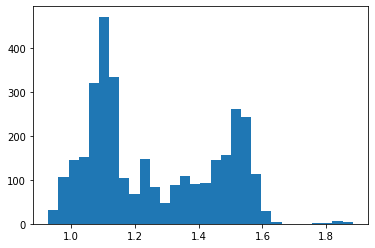

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(u.bonds.values(), bins=30)

These work the same way as `AtomGroup`s. They're sliceable, and indexing them works too to give individual bonds, angles, dihedrals.

# 6. Optional Tasks

- If you haven't already, read through the [selection documentation](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/selections.html) and play around with all the selection options not covered above


- [nglview](https://github.com/nglviewer/nglview#usage) has a lot of options for visualising - you can add multiple selections to one view, change their colour and representation style and more - look through their documentaiton and see what you can create!